#Creating our own dataset using Google Images
In this notebook we are creating our own dataset of teddy bear, black bear and grizzly bear and try to classify between them.We are going to use following javascript code to download the images from Google Images.

**javascript code**:

urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);

window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));






In [1]:
#importing the required packages
from fastai.vision import *
from fastai.metrics import error_rate


In [2]:
import torch
print(torch.cuda.is_available())

True


In [3]:
#get the current working directory
cwd = os.getcwd()
print(cwd)

C:\Users\KV\desktop\train


In [4]:
#deleting corrupted images
classes = ['Cataracts_eyes','Diabetic_retinopathy_eyes','Glaucoma_eyes','Healthy_eyes','Macular_degeneration_eyes']
           

for c in classes:
  print(c)
  verify_images(cwd, delete = True, max_size = 500)

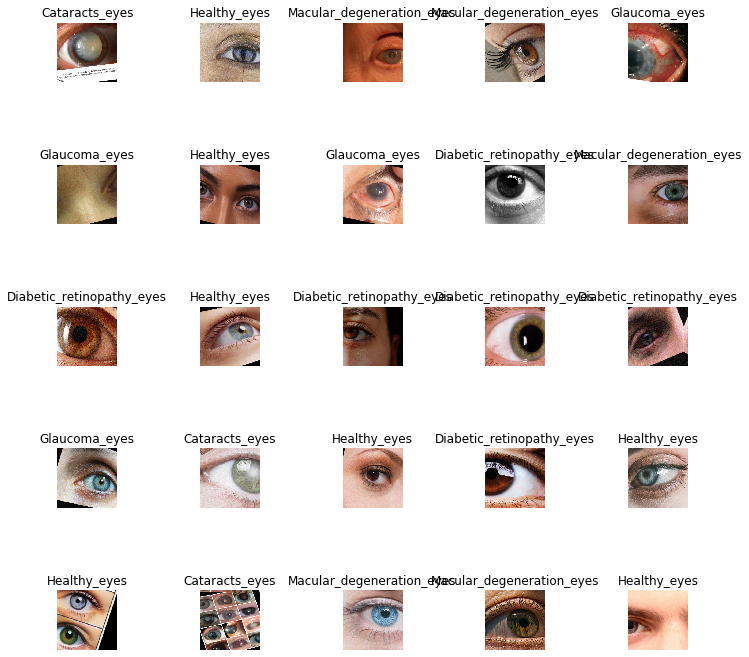

In [5]:
#view data
data = ImageDataBunch.from_folder(cwd, train='.', valid_pct = 0.2, seed=66,
                                  ds_tfms = get_transforms(), size = 224).normalize(imagenet_stats)
data.show_batch(rows = 5, figsize = (10,10))

In [6]:
print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

['Cataracts_eyes', 'Diabetic_retinopathy_eyes', 'Glaucoma_eyes', 'Healthy_eyes', 'Macular_degeneration_eyes', 'train']
1352
337


#Training

In [7]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [8]:
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,error_rate,time
0,2.641640,1.447908,0.525223,01:07
1,2.022190,0.977441,0.332344,01:05
2,1.598194,0.698540,0.231454,01:05
3,1.282169,0.648133,0.189911,01:05
4,1.055611,0.592693,0.186944,01:05
5,0.907213,0.501398,0.148368,01:06
6,0.762497,0.467696,0.160237,01:06
7,0.673033,0.447958,0.136499,01:06
8,0.596527,0.396886,0.133531,01:08
9,0.527620,0.392405,0.130564,01:08


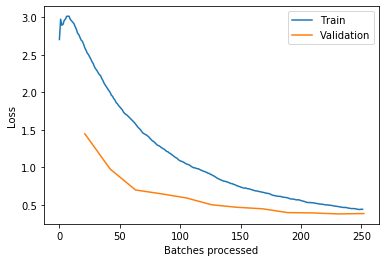

In [9]:
learn.recorder.plot_losses()

In [10]:
learn.save('stage-1')

In [11]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


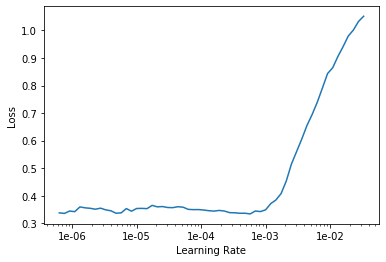

In [12]:
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(3,max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.399916,0.381950,0.118694,01:06
1,0.329010,0.260735,0.080119,01:05
2,0.292056,0.269036,0.080119,01:07


This doesn't help much so we use the stage-1 training.

In [14]:
learn.save('stage-2')

#Interpretation

In [15]:
learn.load('stage-1');

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

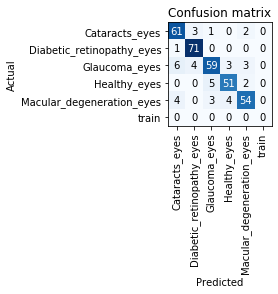

In [17]:
interp.plot_confusion_matrix()

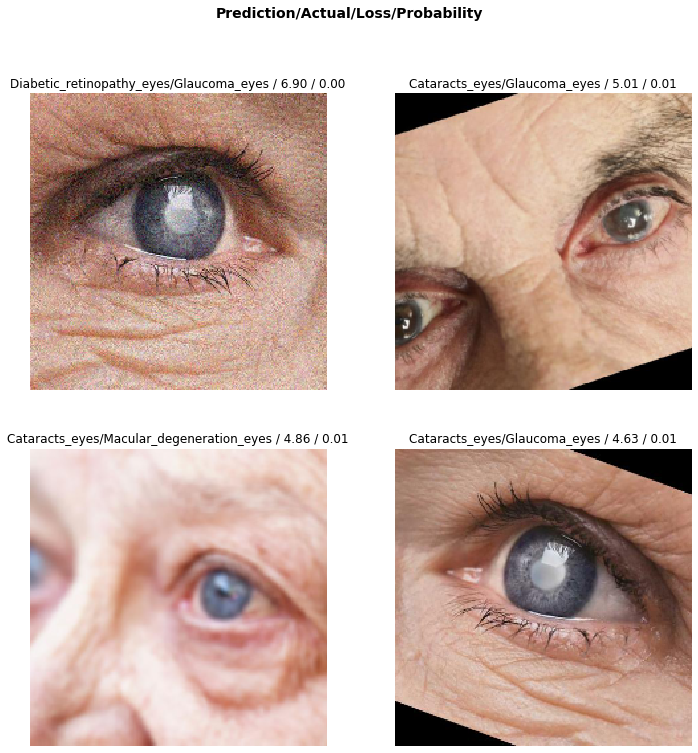

In [18]:
interp.plot_top_losses(k = 4, heatmap=False)

#Prediction

In [19]:
defaults.device = torch.device('cuda')

In [20]:
learn.export()

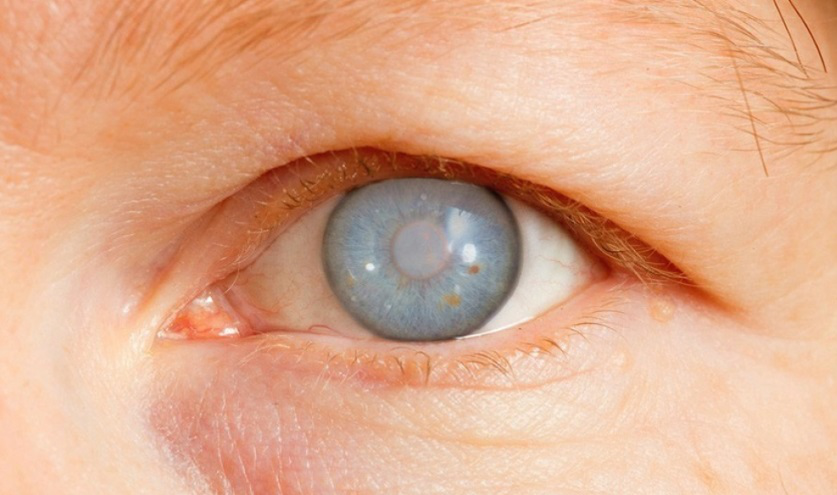

In [21]:
#example image
img = open_image(cwd+'/Glaucoma.jpg')
img

In [22]:
learn = load_learner(cwd)

In [23]:
pred,idx,outputs = learn.predict(img)
print('Predicted class: ',pred)

Predicted class:  Glaucoma_eyes
